### Neural Networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

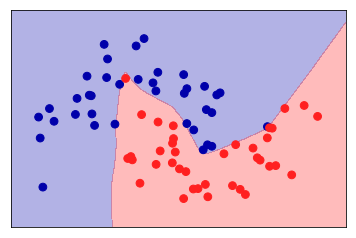

In [16]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=60, cmap=mglearn.cm2)

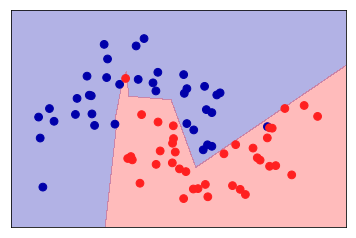

In [17]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

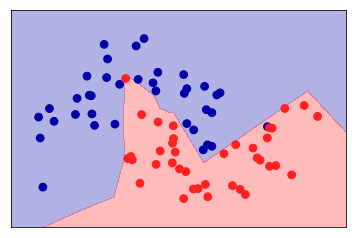

In [18]:
# using two hidden layer, with 10 units each

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])

mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

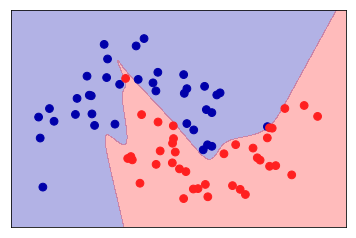

In [19]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity


mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', hidden_layer_sizes=[10, 10])

mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

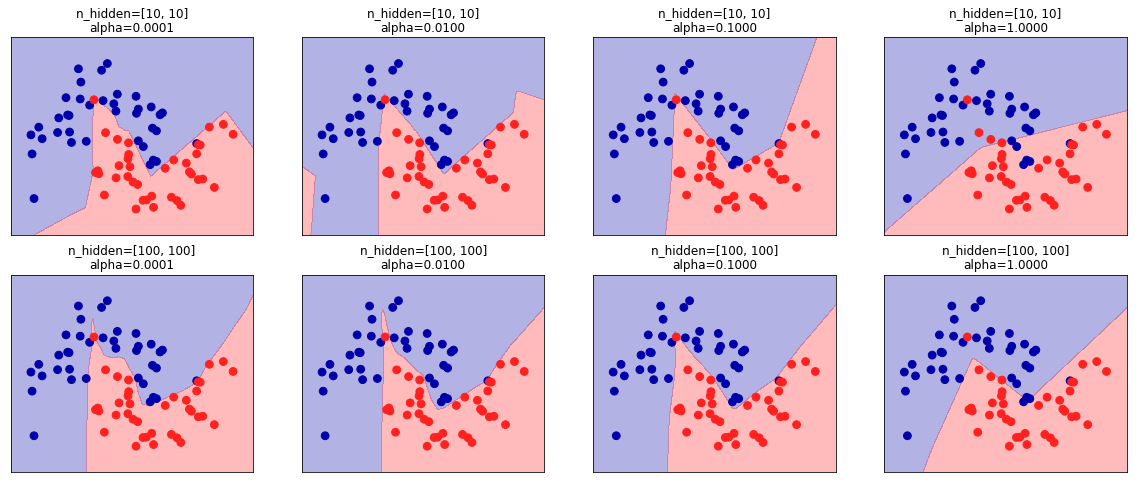

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [10, 100]):
    for axx, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axx)
        axx.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
        axx.set_title("n_hidden=[%d, %d]\nalpha=%.4f"
                      % (n_hidden_nodes, n_hidden_nodes, alpha))

In [37]:
# Breast cancer data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

print('accuracy on training set: {:.2f}'.format(mlp.score(X_train, y_train)))
print('accuracy on test set: {:.2f}'.format(mlp.score(X_test, y_test)))

accuracy on training set: 0.91
accuracy on test set: 0.93


### Rescale data

In [46]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)

# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# substract the mean, scale by inverse standard deviation
# afterwards, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# use the same transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [48]:
mlp = MLPClassifier(random_state=0).fit(X_train_scaled, y_train)

print('accuracy on training set: {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('accuracy on test set: {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

accuracy on training set: 0.99
accuracy on test set: 0.97


c:\users\balu.chandra\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [49]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train_scaled, y_train)

print('accuracy on training set: {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('accuracy on test set: {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

accuracy on training set: 1.00
accuracy on test set: 0.97


In [51]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0).fit(X_train_scaled, y_train)

print('accuracy on training set: {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('accuracy on test set: {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

accuracy on training set: 0.99
accuracy on test set: 0.97
